## Steps to ensure compilation of atm.f

1. Ensure that you are in QXMD_Course/src/atm folder 

2. Way to ensure this is `pwd`in your current folder and look for QXMD_Course/src/atm as relative address

3. Run `make ifort` from this directory

In [9]:
! make ifort

mkdir Atm
mkdir data
sed "s/^#IFORT#//" Sources/Makefile > Atm/Makefile


## Compilation of atm.f continued

1. Compile the atm.f code by executing `make atm` command.
2. This will compile the code with all it's dependencies and move the `./atm` executable at root level

In [10]:
! make atm 

cd Atm;  make atm
make[1]: Entering directory `/staging/an/hk_658/QXMD_Course_work/atm/Atm'
cp ../Sources/ftmain.f90 ./ftmain.F90
ifort -c  ftmain.F90
ftmain.F90(1285): remark #8291: Recommended relationship between field width 'W' and the number of fractional digits 'D' in this edit descriptor is 'W>=D+7'.
   2005 FORMAT(A2,I5,' (',D16.10,' )  ',10A8)
---------------------------^
cp ../Sources/funcs.f90  ./funcs.F90
ifort -c  funcs.F90
cp ../Sources/input.f90  ./input.F90
ifort -c  input.F90
cp ../Sources/vxc.f90    ./vxc.F90
ifort -c  vxc.F90
cp ../Sources/ae.f90     ./ae.F90
ifort -c  ae.F90
cp ../Sources/vloc.f90   ./vloc.F90
ifort -c  vloc.F90
cp ../Sources/pp.f90     ./pp.F90
ifort -c  pp.F90
cp ../Sources/ecut.f90   ./ecut.F90
ifort -c  ecut.F90
cp ../Sources/trans.f90  ./trans.F90
ifort -c  trans.F90
Loading atm ... 
ifort ftmain.o funcs.o input.o vxc.o ae.o vloc.o pp.o ecut.o trans.o -o atm
mv atm ..
done
make[1]: Leaving directory `/staging/an/hk_658/QXMD_Course_work/atm/Atm'

## Edit in7.dat if necessary (can be done within the jupyter notebook)

1. Define the atom by the atomic number
2. Change the valence electron distribution
3. Change reference energies and cutoff radii for pseudo-wavefuncions

## Executing  `atm` executable

1. This code reads in7.dat and constructs the PAW potential
2. Run the exectuable by typing `./atm`

In [10]:
! ./atm

 open :in7.dat             

 Self-consistent LDA calculation for atom: AU

 (initial data):
          MESH = 2001      RMAX = 100.00        PHI =  0.3000000
             Z =   79.0    RINF =  75.00       EDEL =  0.0000000
          XION =    1.0       H = 100.00       VDEL =  0.0000010
           NC1 =  300      TIME =  60.00       LATT =  F

 (electron configuration):
       NLJC   orbit    WNLJ      energy (Ryd.)
   1    100     1S    2.0000       0.0000000
   2    200     2S    2.0000       0.0000000
   3    210     2P    6.0000       0.0000000
   4    300     3S    2.0000       0.0000000
   5    310     3P    6.0000       0.0000000
   6    320     3D   10.0000       0.0000000
   7    400     4S    2.0000       0.0000000
   8    410     4P    6.0000       0.0000000
   9    420     4D   10.0000       0.0000000
  10    500     5S    2.0000       0.0000000
  11    510     5P    6.0000       0.0000000
  12    430     4F   14.0000       0.0000000
  13    521     5D   10.0000       0.000

 data/AU_2S.wvf      
 data/AU_2P.wvf      
 data/AU_3S.wvf      
 data/AU_3P.wvf      
 data/AU_3D.wvf      
 data/AU_4S.wvf      
 data/AU_4P.wvf      
 data/AU_4D.wvf      
 data/AU_5S.wvf      
 data/AU_5P.wvf      
 data/AU_4F.wvf      
 data/AU_5D.wvf      
 data/AU_6S.wvf      
 data/AU_6P.wvf      

 ---- LDA calculation for AU ( Z =  79.00 ) -----------------------------------
      Total No. of electrons :  78.000000  ( ion =  1.000000 )

 (problem converged):
       orbit   electrons   energy (Ryd.)          (eV)
   1    1S      2.000000   -5938.4670120  -80797.59447
   2    2S      2.000000   -1048.2613861  -14262.43477
   3    2P      6.000000    -906.1543348  -12328.95465
   4    3S      2.000000    -247.8900037   -3372.74181
   5    3P      6.000000    -206.6802370   -2812.04997
   6    3D     10.000000    -162.7069589   -2213.75834
   7    4S      2.000000     -54.2916797    -738.68174
   8    4P      6.000000     -40.7819766    -554.87142
   9    4D     10.000000     -

 AU_S1.wps           
 AU_S1.pwf           
 AU_S1.ae            
 AU_P3.wps           
 AU_P3.pwf           
 AU_P3.ae            
 AU_D5.wps           
 AU_D5.pwf           
 AU_D5.ae            
 AU_local            
  No. of valence electrons (soft part):   8.64575592356122     
  No. of valence electrons (hard part):   1.35421532991858     
  No. of valence electrons (  total  ):   9.99997125347979     
 AU_val              

 ----- atomic calculation ended ( code : 0 ) -----


### Compare all electron and pseudo wavefunctions

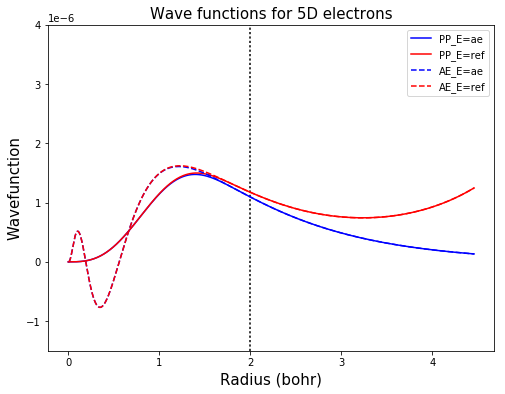

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

ymin, ymax = -0.0000015, 0.000004

r10, r11, r12 = [],[],[]
r20, r21, r22 = [],[],[]

# cutoff = 2 bohr
pl = plt.vlines([2], ymin, ymax, linestyle='dotted')

# AE wavefunctions
ffile1 = open('D_Pae.dat', 'r')
# PS wavefunctions
ffile2 = open('D_Pus.dat', 'r')

lines1 = ffile1.readlines()
lines2 = ffile2.readlines()
for line in lines1:
    r10.append(float(line.split()[0]))
    r11.append(float(line.split()[1]))
    r12.append(float(line.split()[2]))
   
for line in lines2:
    r20.append(float(line.split()[0]))
    r21.append(float(line.split()[1]))
    r22.append(float(line.split()[2]))

fig = plt.gcf()
fig.set_size_inches(8, 6)


p1 = plt.plot(r20, r21, "blue")
p1 = plt.plot(r20, r22, "red")
p1 = plt.plot(r10, r11, "blue", linestyle='dashed')
p1 = plt.plot(r10, r12, "red", linestyle='dashed')

plt.ylim(ymin, ymax)
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
plt.ylabel('Wavefunction', size=15)
plt.xlabel('Radius (bohr)', size=15)
plt.legend(('PP_E=ae', 'PP_E=ref', 'AE_E=ae', 'AE_E=ref'), loc='upper right')
plt.title('Wave functions for 5D electrons', size = 15)

plt.show()


### Compare logarithmic derivatives of all electron and pseudo wavefunctions

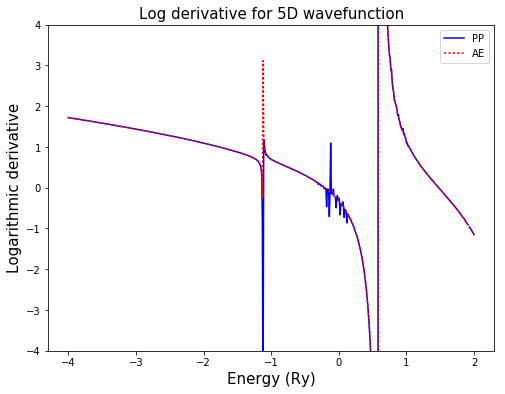

In [9]:
import numpy as np
import matplotlib.pyplot as plt

ymin, ymax = -4, 4

r10, r11, r12 = [],[],[]
r20, r21, r22 = [],[],[]

# AE wavefunctions
ffile1 = open('D_chiae.dat', 'r')
# PS wavefunctions
ffile2 = open('D_chil.dat', 'r')

lines1 = ffile1.readlines()
lines2 = ffile2.readlines()
for line in lines1:
    r10.append(float(line.split()[0]))
    r11.append(float(line.split()[1]))
   
for line in lines2:
    r20.append(float(line.split()[0]))
    r21.append(float(line.split()[1]))

fig = plt.gcf()
fig.set_size_inches(8, 6)
##fig.savefig('test5D-log.png', dpi=300)

p1 = plt.plot(r20, r21, "blue")
p1 = plt.plot(r10, r11, "red", linestyle='dotted')
plt.ylim(ymin, ymax)
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
plt.ylabel('Logarithmic derivative', size=15)
plt.xlabel('Energy (Ry)', size=15)
plt.legend(('PP', 'AE'), loc='upper right')
plt.title('Log derivative for 5D wavefunction', size = 15)
plt.show()


### Estimation of plane-wave cutoff energies for wavefunctions

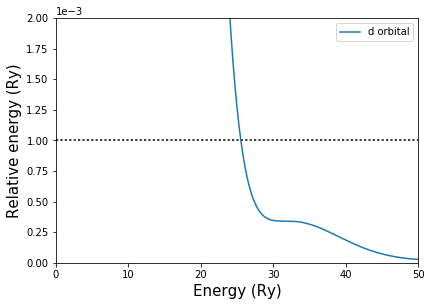

In [14]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = 0, 50
ymin, ymax = 0, 0.002

r10, r11, r12 = [],[],[]
r20, r21, r22 = [],[],[]

pl = plt.hlines([0.001], xmin, xmax, linestyle='dotted')

ffile1 = open('D_delE.dat', 'r')

lines1 = ffile1.readlines()

for line in lines1:
    r10.append(float(line.split()[0]))
    r11.append(float(line.split()[1]))
   
fig = plt.gcf()
fig.set_size_inches(6.5, 4.5)
fig.savefig('test5D-delE.png', dpi=300)

p1 = plt.plot(r10, r11)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
plt.ylabel('Relative energy (Ry)', size=15)
plt.xlabel('Energy (Ry)', size=15)
plt.legend(('d orbital',), loc='upper right')

plt.show()


### Estimation of plane-wave cutoff energies for electron densities

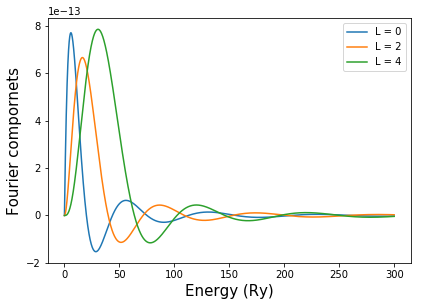

In [15]:
import numpy as np
import matplotlib.pyplot as plt

r10, r11, r12, r13 = [], [], [], []

ffile1 = open('D_Qbar.dat', 'r')

lines1 = ffile1.readlines()
for line in lines1:
    r10.append(float(line.split()[0]))
    r11.append(float(line.split()[1]))
    r12.append(float(line.split()[2]))
    r13.append(float(line.split()[3]))

   
fig = plt.gcf()
fig.set_size_inches(6.5, 4.5)
fig.savefig('test5D-Qbar.png', dpi=300)

p1 = plt.plot(r10, r11)
p1 = plt.plot(r10, r12)
p1 = plt.plot(r10, r13)

plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
plt.ylabel('Fourier compornets', size=15)
plt.xlabel('Energy (Ry)', size=15)
plt.legend(('L = 0', 'L = 2', 'L = 4'), loc='upper right')

plt.show()
